In [4]:
# 사이킷런 이용하기

from sklearn.datasets import load_iris

ds = load_iris()
print(ds.keys())
# print(ds.DESCR)
print(type(ds))
print(ds['data'].shape)
print(ds['target'].shape)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
<class 'sklearn.utils.Bunch'>
(150, 4)
(150,)


In [28]:
# 씨본 이용 하기

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# iris data loading
df = sns.load_dataset('iris')
type(df)
df.shape
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [18]:
# data
# label
x = df.iloc[:, :4]
y = df.iloc[:,-1] # 순서대로 되어있어서 섞어줄 필요가 있다.
y 

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [20]:
from sklearn.model_selection import train_test_split

# 훈련데이터와 정답데이터로 나눠주고 섞어주기까지 해준다.
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0) 

# 75% : 25%
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

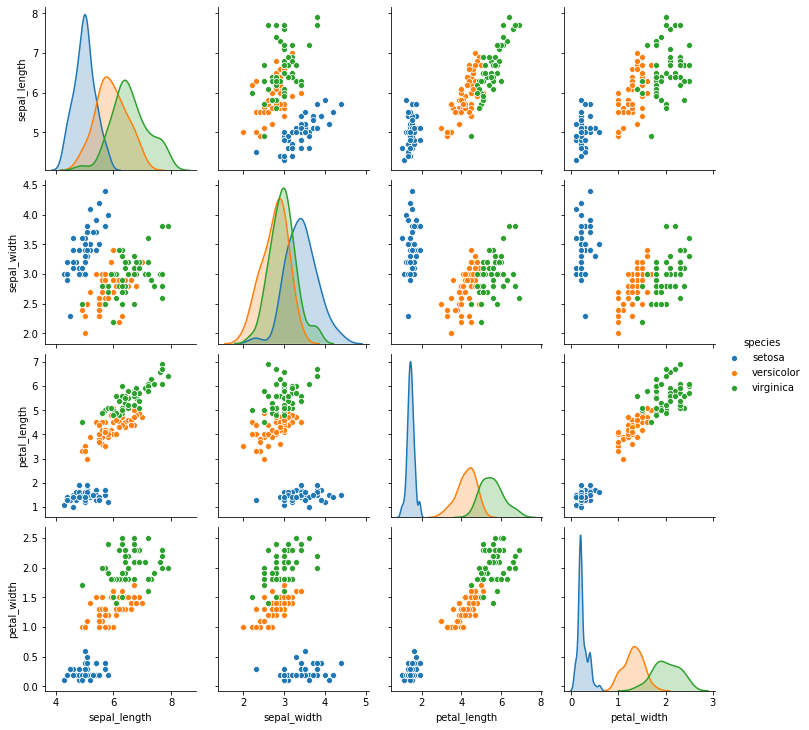

In [23]:
# 데이터 조사
# 산점도 행렬 : 3개 이상의 특성을 표현
# 4개의 특성을 갖는 붓꽃
# 대각원소 자리에 각 변수별 히스토그램
sns.pairplot(df, diag_kind='kde', hue='species') # hue 어떤것을 기준으로 색을 나누는지
plt.show()

In [41]:
# 머신러닝 모델
# k-최근접 이웃 알고리즘
# 훈련 데이터에서 새로운 데이터 포인트에 가장 가까운 'k개'의 이웃을 찾는다.

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [42]:
# 예측하기
x_new = np.array( [ [5, 2.9, 1, 0.2] ] )
x_new.shape

pre = model.predict(x_new)
pre

array(['setosa'], dtype=object)

In [43]:
# 모델 평가
# 테스트 세트 이용
from sklearn import metrics

pre = model.predict(x_test)
ac_score = metrics.accuracy_score(y_test, pre)
print('정답률 : ',ac_score)

정답률 :  0.9736842105263158
